#### 1 - 3D Plot, Contour, Surface Plot

<Figure size 640x480 with 0 Axes>

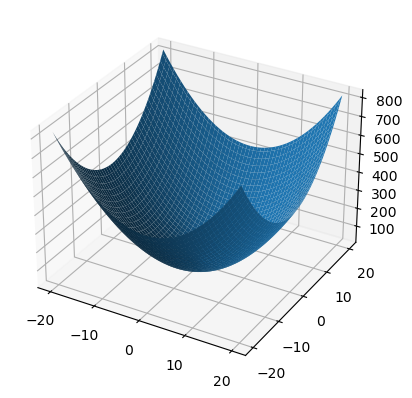

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = plt.figure().add_subplot(projection='3d')
x = np.linspace(-20,20,100)
y = np.linspace(-20,20,100)
x, y = np.meshgrid(x, y)
z = x**2 + y**2 + 25
ax.plot_surface(x,y,z)


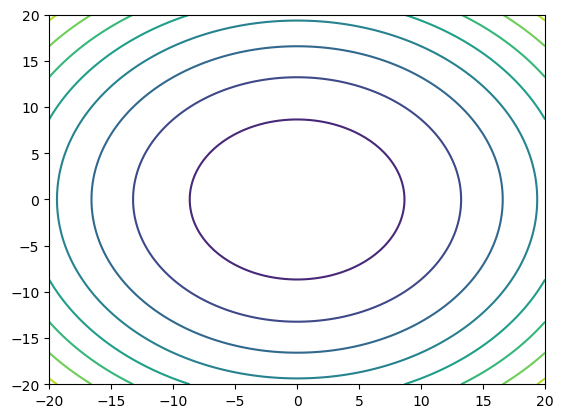

In [47]:
fig = plt.figure()  # Force a new figure
plt.contour(x, y, z)

In [6]:
grad_x = []
grad_y = []
xm = []
ym = []
def gradient_descent(lr,num_iterations):
    xmin = 10
    ymin = 10
    gradx = 2*xmin
    grady = 2*ymin
    xm.append(xmin)
    ym.append(ymin)
    for i in range(num_iterations):
        xmin -= lr*gradx
        ymin -= lr*grady
        gradx = 2*xmin
        grady = 2*ymin
        xm.append(xmin)
        ym.append(ymin)
    zmin = xmin**2 + ymin**2 + 25
    return xmin ,ymin, zmin

Minimum value: 25.0 , xmin: 1.5134705823042405e-193 , ymin: 1.5134705823042405e-193


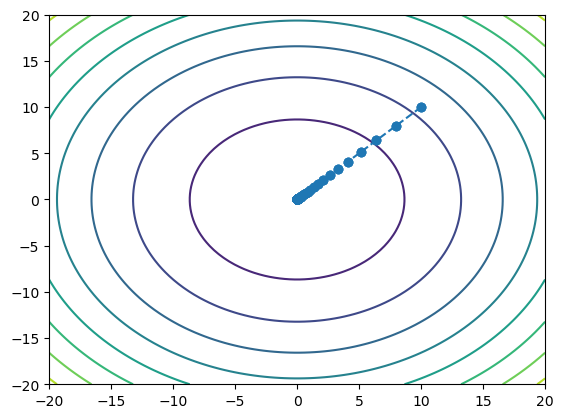

In [9]:
xmin ,ymin, zmin = gradient_descent(0.1,2000)
fig = plt.figure()  # Force a new figure
plt.contour(x, y, z)
plt.plot(xm,ym,'o--')
print("Minimum value:",zmin, ", xmin:",xmin,", ymin:",ymin)

In [ ]:
def f(x):
    return (x**2 + 2*x + 3)

def grad_f(x):
    return (2*x + 2)
def newton_raphson(num_iterations):
    xmin = 0.5
    for i in range(num_iterations):
        xmin -= f(xmin)/grad_f(xmin)
    y = xmin**2 + 2*xmin + 3
    return xmin , y

xmin ,ymin = newton_raphson(30)
print(" xmin:",xmin,", ymin:",ymin)

### 2 - Integrals of all functions

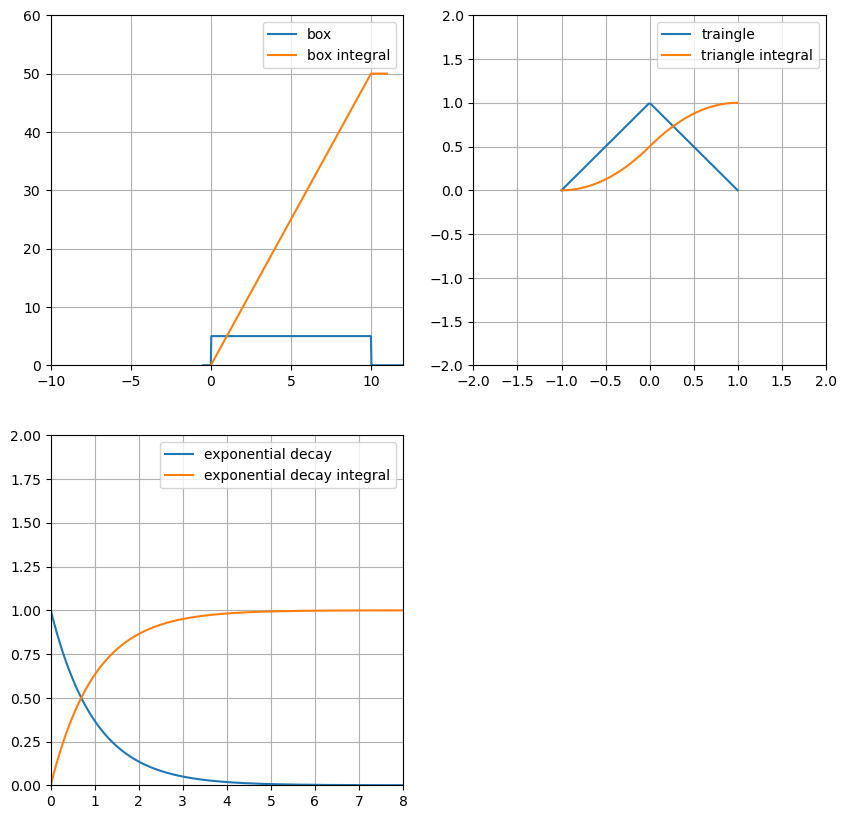

In [25]:
from scipy.integrate import cumtrapz
from sympy import *
from scipy import integrate
x = Symbol("x")

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.ylim(0,60)
plt.xlim(-10,12)
x = np.linspace(-0.5,15,500)
x1 = np.linspace(0,11,100)
y = []
y1 = []

for i in range(500):
    if x[i]>=0 and x[i]<10:
        y.append(5)
    else:
        y.append(0)


def f1(x):
    if x>=0 and x<10:
        y = 5
    else:
        y= 0
    return y
inte1 = []
for i in range(100):
    y2,err = integrate.quad(f1,0,x1[i])
    inte1.append(y2)
plt.plot(x,y,label='box')
plt.plot(x1,inte1,label='box integral')
plt.grid()
plt.legend()

plt.subplot(2,2,2)
plt.ylim(-2,2)
plt.xlim(-2,2)
x = np.linspace(-1,1,100)
y = []

for i in range(100):
    if x[i]<-1:
        y.append(0)
    elif x[i]>-1 and x[i]<0:
        y.append(x[i]+1)
    elif x[i]>=0 and x[i]<1:
        y.append(1-x[i])
    else:
        y.append(0)
        
x1 = np.linspace(-1,1,100)
y1 = []
def f(x1):
    if x1<-1:
        y =  0
    elif x1>-1 and x1<0:
        y = x1+1
    elif x1>=0 and x1<1:
        y = 1-x1
    else:
        y= 0
    return y
inte1 = []
for i in range(100):
    y2,err = integrate.quad(f,-1,x1[i])
    inte1.append(y2)



plt.plot(x,y,label='traingle')
plt.plot(x1,inte1,label='triangle integral')
plt.grid()
plt.legend()

plt.subplot(2,2,3)
plt.ylim(0,2)
plt.xlim(0,8)
x = np.linspace(0,10,1000)
y = np.exp(-x)

def nexp(x):
    return np.exp(-x)      
x1 = np.linspace(0,10,1000)
y1 = []

inte1 = []
for i in range(1000):
    y2,err = integrate.quad(nexp,0,x1[i])
    inte1.append(y2)



plt.plot(x,y,label='exponential decay')
plt.plot(x1,inte1,label='exponential decay integral')
plt.grid()
plt.legend()

#### 3 - Autocorrelation without and with library functions

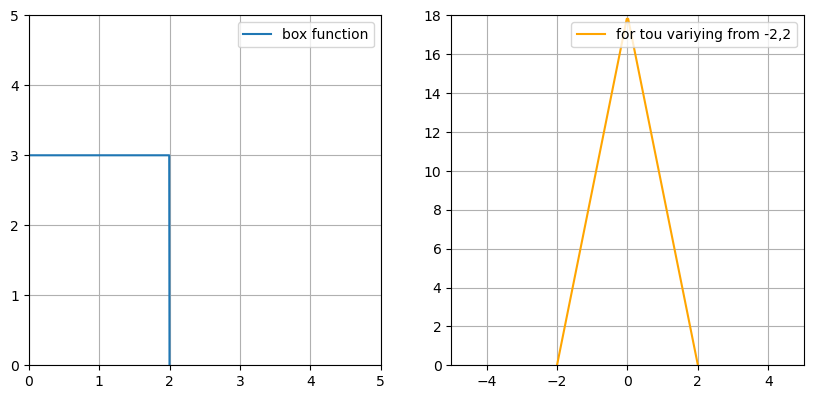

In [279]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.ylim(0,5)
plt.xlim(0,5)
x = np.linspace(0,2,500)
y = []
for i in range(500):
    if x[i]>=0 and x[i]<2:
        y.append(3)
    else:
        y.append(0)
x1 = np.linspace(-2,2,100)
y1 = []

def f(x):
    if x>=0 and x<2:
        y= 3
    else:
        y= 0
    return y
inte1 = []

for i in range(100):
    if x1[i]>=0:
        y2,err = integrate.quad(f,0,2-x1[i])
        y2 = 3*y2
        inte1.append(y2)
    else:
        y2,err = integrate.quad(f,0,2+x1[i])
        y2 = 3*y2
        inte1.append(y2)


plt.plot(x,y,label='box function')
plt.grid()
plt.legend()
plt.subplot(2,2,2)
plt.ylim(0,18)
plt.xlim(-5,5)
plt.plot(x1,inte1,color='orange',label='for tou variying from -2,2')
plt.grid()
plt.legend(loc='upper right')

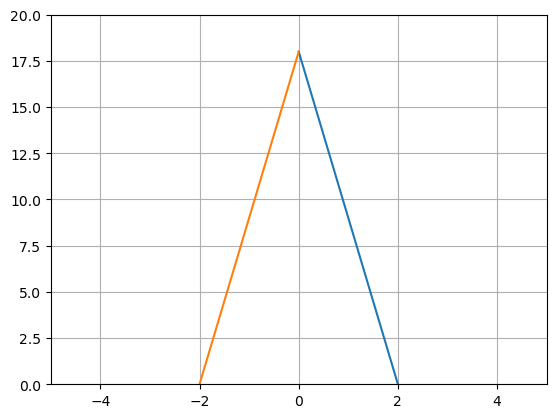

In [27]:
plt.ylim(0,20)
plt.xlim(-5,5)
x = [9]

t1 = np.linspace(0,2,20)
t2 = np.linspace(0,-2,20)
c1 = np.correlate(x,t1,'full')
c2 = np.correlate(x,-t2,'full')
plt.plot(t1,c1)
plt.plot(t2,c2)
plt.grid()